In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pyxdf as xdf
import seaborn as sb

In [2]:
def select_lsl_stream(stream_name, streams):
    # Extract streams
    #  monogen: all variables at 8 Hz
    #  markers: Important events
    #  status : all variables on every important event (marker)
    #  kinect : XYZ pose coordinates at 60 Hz
    stream_list = streams[0]  
    for stream in stream_list:
        if stream['info']['name'][0] ==  stream_name:  
            return stream['time_series'], stream['time_stamps'], stream['info']['effective_srate']            
    return False

In [3]:
import glob

columns = ['density', 'evenness', 'syncopation', 'swing', 'cursor_position', 'bangBack', 'S_kick-snare', 'encuesta', 'valorA', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'momento_significativo', 'kick-snare', 'knob_start_value', 'trainorexperiment', 'pleasure', 'urgetomove']
df_all = pd.DataFrame(columns = columns)
df_all['participant'] = ''

for xdf_file in glob.glob("data/*.xdf"): 
    streams = xdf.load_xdf(xdf_file)
    status_time_series, status_timestamps, status_sample_rate = select_lsl_stream('status', streams)
    df = pd.DataFrame(status_time_series, columns = columns)
    df_out = df.loc[df['momento_significativo'] == 2]
    df_out['participant'] = xdf_file
    df_all = pd.concat([df_all, df_out])
    print(xdf_file)
    
columns_selected = ['evenness', 'syncopation', 'swing', 'pleasure', 'urgetomove']    
df = df_all[columns_selected]

Stream 3: Calculated effective sampling rate 53.1472 Hz is different from specified rate 60.0000 Hz.
<ipython-input-3-8ffb2a6b3d51>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['participant'] = xdf_file


data/P09.xdf
data/P08.xdf
data/P05.xdf
data/P10.xdf
data/P04.xdf
data/P06.xdf


Stream 3: Calculated effective sampling rate 6.1893 Hz is different from specified rate 8.0000 Hz.


data/P07.xdf
data/P03.xdf
data/P02.xdf
data/P01.xdf


In [4]:
df = df.astype({'urgetomove':'int', 'pleasure':'int'}) 
df

,evenness,syncopation,swing,pleasure,urgetomove
3,0.675,0.650,69.375,5,3
7,0.450,0.400,54.375,3,3
11,0.775,0.350,58.125,6,5
15,0.275,1.000,70.625,3,3
21,0.750,0.875,69.375,4,4
...,...,...,...,...,...
31,0.000,0.125,50.000,3,6
35,0.125,0.125,53.125,4,6
39,0.725,0.525,64.375,7,7
45,0.300,0.875,69.375,7,6


In [5]:
df.describe()

,evenness,syncopation,swing,pleasure,urgetomove
count,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.537609,0.556087,63.315216,4.886957,4.895652
std,0.200640,0.259461,7.055628,1.620944,1.773953
min,0.000000,0.000000,50.000000,1.000000,1.000000
25%,0.412500,0.400000,58.125000,4.000000,3.000000
50%,0.500000,0.550000,62.500000,5.000000,5.000000
75%,0.675000,0.787500,69.375000,6.000000,6.000000
max,1.000000,1.000000,75.000000,7.000000,7.000000


In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,evenness,syncopation,swing,pleasure,urgetomove
evenness,1.00,0.27,0.29,0.08,0.07
syncopation,0.27,1.00,0.02,0.10,-0.02
swing,0.29,0.02,1.00,0.02,-0.06
pleasure,0.08,0.10,0.02,1.00,0.85
urgetomove,0.07,-0.02,-0.06,0.85,1.00


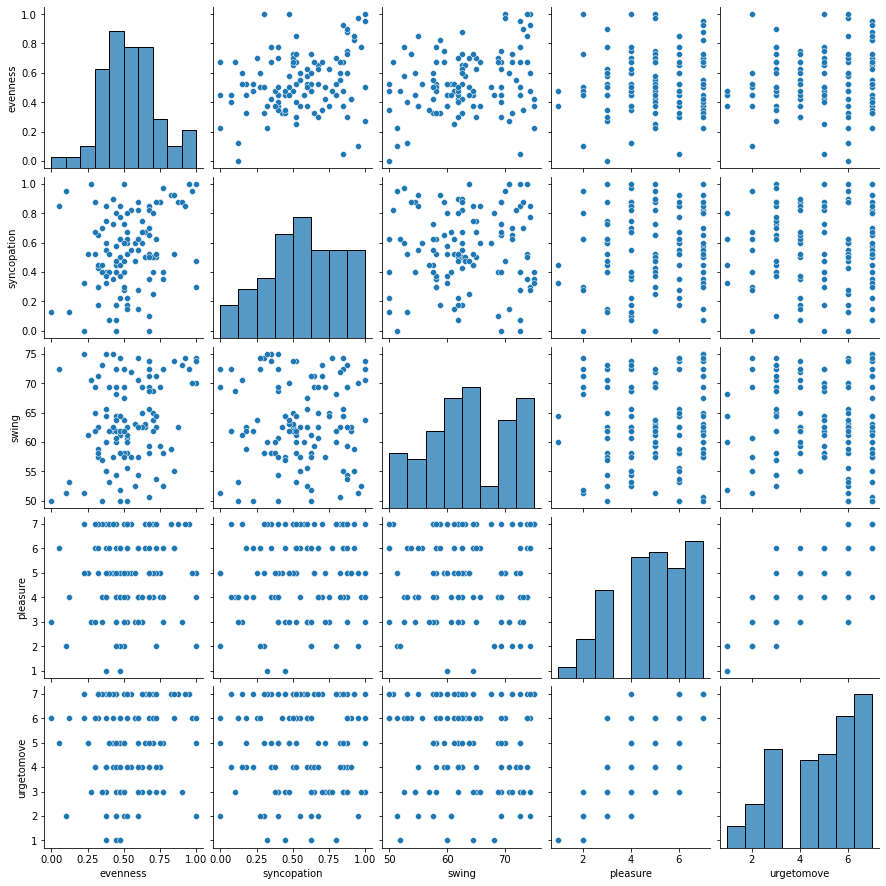

In [7]:
sb.pairplot(df)

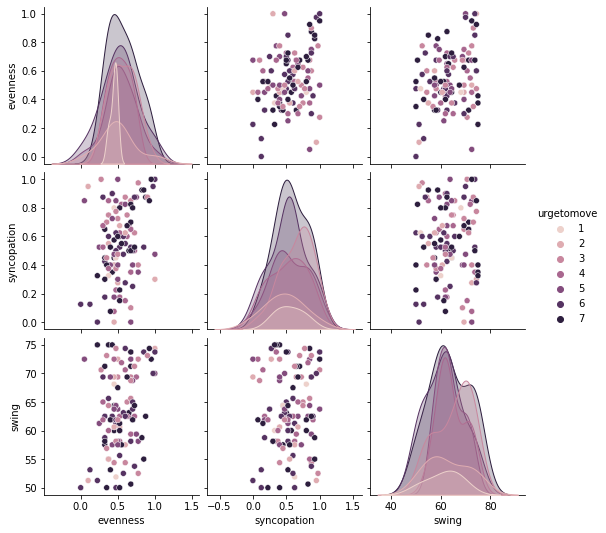

In [8]:
dfu=df.drop(columns=["pleasure"])
sb.pairplot(dfu, hue='urgetomove')

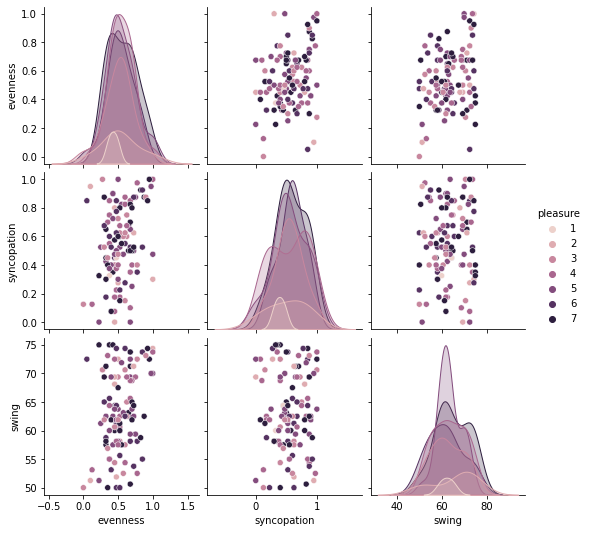

In [9]:
dfv=df.drop(columns=["urgetomove"])
sb.pairplot(dfv, hue='pleasure')

<AxesSubplot:xlabel='urgetomove', ylabel='evenness'>

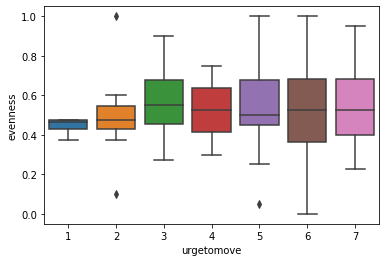

In [10]:
#plt.figure(figsize=(15,7))
sb.boxplot(y="evenness", x="urgetomove", data=df)

<AxesSubplot:xlabel='urgetomove', ylabel='syncopation'>

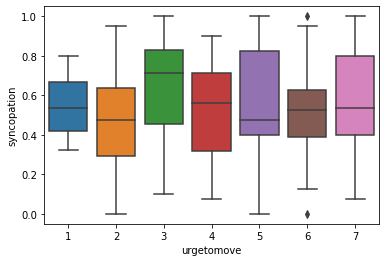

In [11]:
sb.boxplot(y="syncopation", x="urgetomove", data=df)

<AxesSubplot:xlabel='urgetomove', ylabel='swing'>

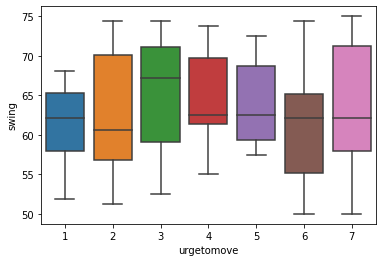

In [12]:
sb.boxplot(y="swing", x="urgetomove", data=df)

<AxesSubplot:xlabel='pleasure', ylabel='evenness'>

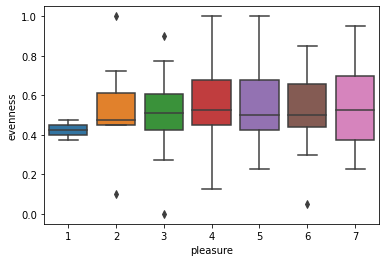

In [13]:
sb.boxplot(y="evenness", x="pleasure", data=df)


<AxesSubplot:xlabel='pleasure', ylabel='syncopation'>

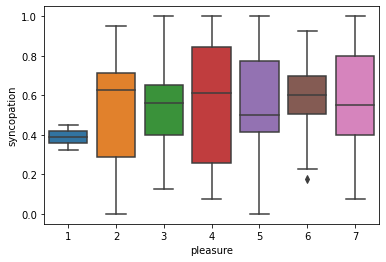

In [14]:
sb.boxplot(y="syncopation", x="pleasure", data=df)

<AxesSubplot:xlabel='pleasure', ylabel='swing'>

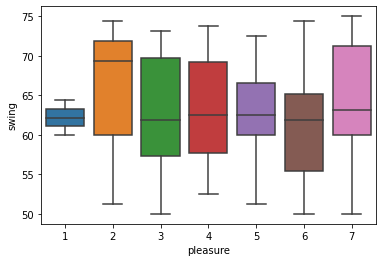

In [15]:
sb.boxplot(y="swing", x="pleasure", data=df)